In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("spearman_corr.csv")
df_month

,May_3,April,May_5,May_4,May,April_5,August,May_8,April_11,April_12,...,December,July_2,September_2,May_10,April_6,June_2,November_2,March_2,June,May_6
0,0.577766,-0.430054,-0.177727,-0.143343,-0.180019,0.061221,-0.112759,0.267263,-0.752232,0.233497,...,0.261739,0.440479,-0.484959,-0.080227,-0.143859,-0.259433,0.248850,-0.435442,0.101071,-0.532818
1,0.820856,-0.520912,0.092602,0.501064,-0.615977,0.410492,-0.112759,0.213306,-0.507175,0.252857,...,0.261739,0.440479,-0.484959,-0.643223,0.066417,-0.259433,0.248850,-0.192187,0.101071,-0.835933
2,0.021220,-0.358331,-0.048001,0.423062,-0.178367,-0.036227,-0.662831,0.753563,-0.538692,0.030851,...,0.358227,0.621258,-0.212760,-0.064889,-0.003255,-0.302931,0.566206,-0.174009,-0.093184,-0.559077
3,0.500332,-0.086501,0.095828,0.620112,0.046174,-0.278462,-0.153128,0.289163,-0.375539,0.250763,...,0.442258,0.447952,-0.149623,-0.367589,-0.066089,-0.195851,0.114616,0.161431,0.331706,-0.715320
4,-0.251811,-0.367780,-0.099620,0.802453,-0.182557,-0.026178,-0.245217,0.407351,-0.531919,0.247581,...,0.539354,0.524410,-0.216733,0.117728,0.383103,-0.438401,0.205089,-0.034999,0.112928,-0.488476
5,0.458342,-0.159302,-0.427378,0.346501,-0.081093,0.636828,0.133823,0.240314,-0.546058,0.398212,...,0.503942,0.689424,-0.285828,0.056031,0.095435,-0.707771,0.181094,-0.392071,0.421856,-0.185403
6,-0.114251,-0.367052,-0.161893,0.480851,-0.014260,0.225270,-0.606914,0.517479,-0.596641,0.440198,...,0.926809,0.318355,-0.526009,0.063204,0.421466,-0.541454,0.154823,-0.362257,0.533683,-0.348330
7,0.075238,-0.398510,-0.419050,0.248047,-0.213742,0.562983,-0.121754,0.122107,-0.125865,0.006531,...,0.326381,0.222617,-0.030648,-0.438990,-0.111018,-0.456827,-0.127531,-0.005687,0.507391,-0.609787
8,-0.349220,-0.673035,-0.257485,0.331374,0.182326,0.093394,-0.339983,0.606392,-0.244421,0.237352,...,0.802450,0.538419,-0.142530,-0.384889,-0.692451,-0.605612,0.244664,-0.101748,0.508126,-0.539790
9,0.516521,-0.369849,-0.296065,0.250620,-0.344650,0.577139,-0.073752,0.467968,-0.429741,0.087189,...,0.191252,0.319448,-0.292448,0.385709,0.527275,-0.570398,0.520107,-0.145554,0.202048,-0.599031


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 9.41004732e-01, -2.00901423e-01,  9.51441790e-04,
        -5.33899568e-01,  4.64197883e-02,  4.47259681e-01,
         4.55165838e-01, -8.39352961e-01, -2.01425422e+00,
         5.43370210e-01],
       [ 1.68998975e+00, -7.25243495e-01,  1.47162924e+00,
         1.07227509e+00, -2.11798047e+00,  1.38701999e+00,
         4.55165838e-01, -1.07259528e+00, -9.85022860e-01,
         6.11958167e-01],
       [-7.73769207e-01,  2.13013566e-01,  7.06704247e-01,
         8.77857486e-01,  5.46233666e-02,  1.85061270e-01,
        -1.93347302e+00,  1.26277541e+00, -1.11739027e+00,
        -1.74581452e-01],
       [ 7.02424755e-01,  1.78175470e+00,  1.48918157e+00,
         1.36900090e+00,  1.16940140e+00, -4.66706917e-01,
         2.79865639e-01, -7.44687556e-01, -4.32154788e-01,
         6.04541358e-01],
       [-1.61500691e+00,  1.58484123e-01,  4.25877290e-01,
         1.82348289e+00,  3.38200930e-02,  2.12098947e-01,
        -1.20019895e-01, -2.33795413e-01, -1.08894493e+00,
         5.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.61674377, -0.09217359,  0.93993046,  0.49033272,  0.14999106,
        -0.24595085, -1.40604246, -0.26488861,  0.46696751,  0.04157715],
       [ 1.18254379, -0.82468828, -0.22915705, -0.8493443 , -2.5859565 ,
        -0.35007918,  0.94311952, -0.94326074, -0.30629162,  1.62145399],
       [-0.64758364,  0.32920858, -0.18556525, -0.71044737, -0.50819673,
         0.93280399, -1.95658582, -0.25301272, -0.36682286,  1.45574501],
       [ 1.36153725, -0.78616866,  0.31946864,  0.14017634, -0.86799655,
         0.69482753,  0.81698969,  1.10476192, -0.0382579 , -0.69893968],
       [ 0.22727989, -0.83563673,  1.68373073, -0.79593932,  0.69851078,
         0.7982998 ,  1.09204415, -0.19354484,  0.3642856 ,  0.14844575],
       [ 0.3055861 ,  0.05162394, -0.5547284 ,  0.58890666,  0.08669426,
        -0.47013827,  0.25046101,  2.57236868,  0.33514994, -0.90685045],
       [-0.49360006,  1.32557613,  0.49196055, -0.60272823,  0.59942016,
         0.50715633, -2.0038209 , -0.07164509

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 21}
Best Score: 0.34360803656987987
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 39}
Best Score: 0.3774683699906949
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 10}
Best Score: 0.4045203138158863
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 49}
Best Score: 0.3048393975348542
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 50}
Best Score: 0.20782936526881685


In [13]:
y_pred_list

[array([-0.06933836,  0.13218215, -0.02993328,  0.00416987,  0.05481674,
         0.17021525, -0.08326251, -0.36295927,  0.57842175, -0.57839688,
        -0.22172975, -0.1307351 ,  0.0499421 , -0.02504886,  0.62334668,
         0.21519144]),
 array([ 0.00365201,  0.21170435,  0.00207864,  0.17951223,  0.13301157,
         0.14168782, -0.3835511 , -0.50539514,  0.28707669, -0.74530809,
        -0.32755227, -0.0330257 ,  0.0856066 , -0.01934929,  0.51609763,
         0.31233319]),
 array([-0.21542698,  0.04111111,  0.09923106,  0.00162273, -0.07203283,
         0.1603364 , -0.37248283, -0.44297222,  0.61322879, -0.48280855,
        -0.24837976, -0.12387143, -0.16154444,  0.23773662,  0.38823333,
         0.36480606]),
 array([-0.15705443,  0.27346311,  0.04514959,  0.01559011,  0.2307836 ,
        -0.22000575, -0.06976255, -0.26053571,  0.68498923, -0.77334645,
        -0.21565669,  0.05156953,  0.22010344,  0.22028494,  0.61417096,
         0.06525781]),
 array([-0.19331768,  0.09437468

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7858988925642795,
 0.7809242523778994,
 0.64572331079521,
 0.7300630025645862,
 0.7667292656667477]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+sst Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 21}
Best Score: 0.34360803656987987
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 39}
Best Score: 0.3774683699906949
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 10}
Best Score: 0.4045203138158863
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 49}
Best Score: 0.3048393975348542
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 50}
Best Score: 0.20782936526881685


In [21]:
y_pred_list_rf

[array([-0.06933836,  0.13218215, -0.02993328,  0.00416987,  0.05481674,
         0.17021525, -0.08326251, -0.36295927,  0.57842175, -0.57839688,
        -0.22172975, -0.1307351 ,  0.0499421 , -0.02504886,  0.62334668,
         0.21519144]),
 array([ 0.00365201,  0.21170435,  0.00207864,  0.17951223,  0.13301157,
         0.14168782, -0.3835511 , -0.50539514,  0.28707669, -0.74530809,
        -0.32755227, -0.0330257 ,  0.0856066 , -0.01934929,  0.51609763,
         0.31233319]),
 array([-0.21542698,  0.04111111,  0.09923106,  0.00162273, -0.07203283,
         0.1603364 , -0.37248283, -0.44297222,  0.61322879, -0.48280855,
        -0.24837976, -0.12387143, -0.16154444,  0.23773662,  0.38823333,
         0.36480606]),
 array([-0.15705443,  0.27346311,  0.04514959,  0.01559011,  0.2307836 ,
        -0.22000575, -0.06976255, -0.26053571,  0.68498923, -0.77334645,
        -0.21565669,  0.05156953,  0.22010344,  0.22028494,  0.61417096,
         0.06525781]),
 array([-0.19331768,  0.09437468

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7858988925642795,
 0.7809242523778994,
 0.64572331079521,
 0.7300630025645862,
 0.7667292656667477]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+sst Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/spearson/comparison plots/randomforest


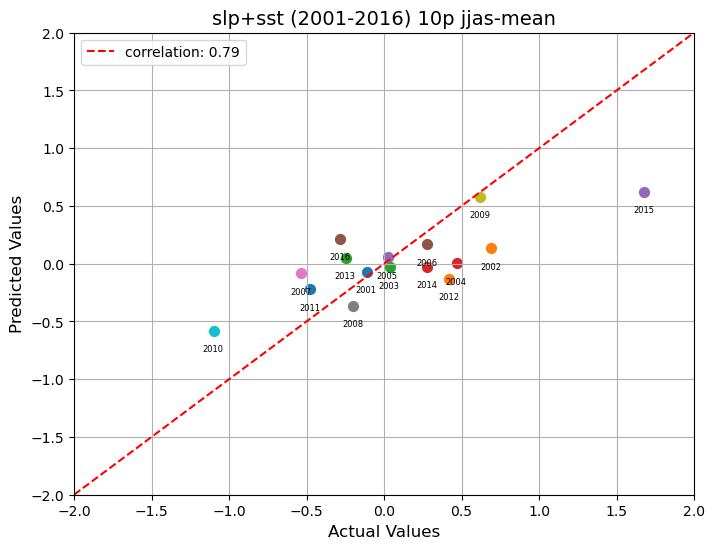

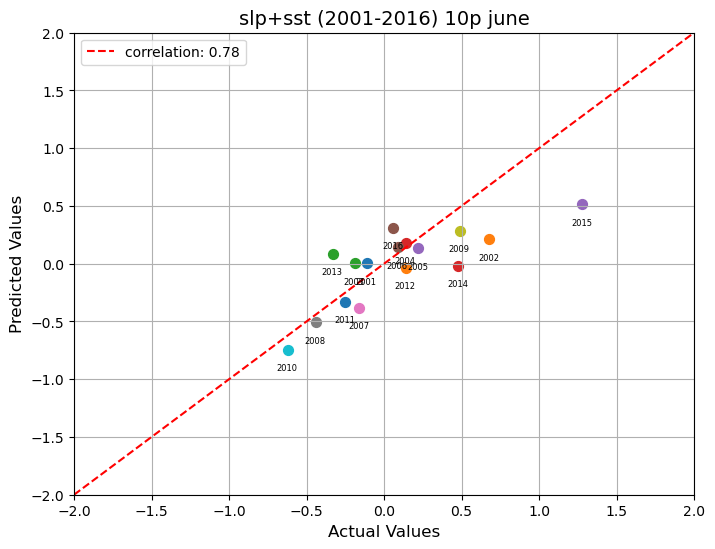

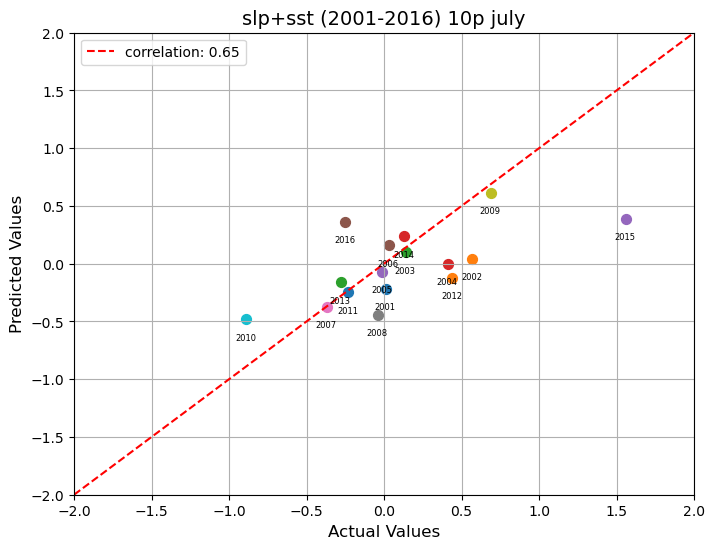

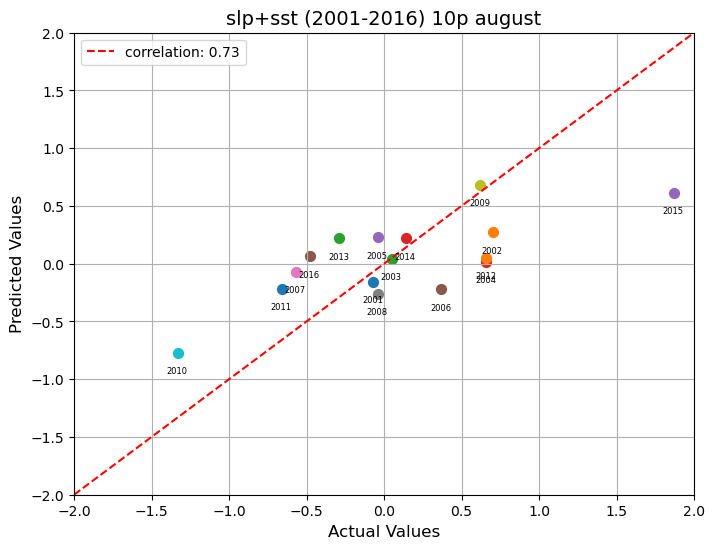

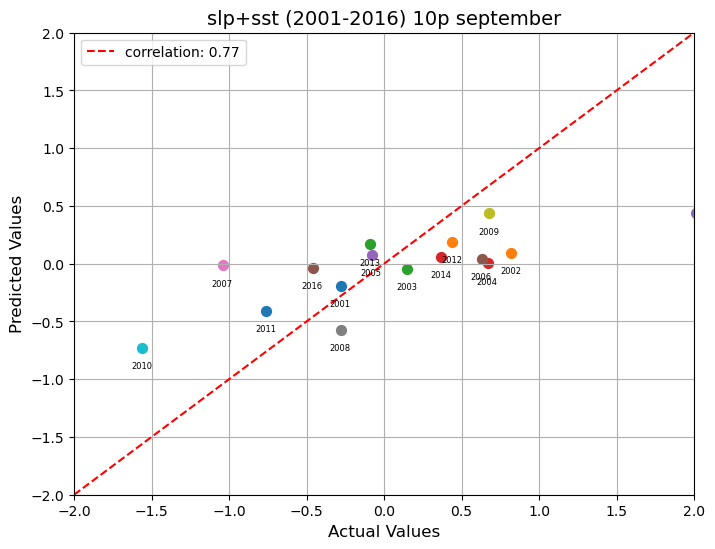

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=50)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show